<a href="https://colab.research.google.com/github/datavzch/GANWS21_DEMO/blob/main/3_StyleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1>Style GAN Introduction</h1>

In this section we will talk about image to image translation by using:

*   StyleGAN


If you have any questions please contact us to: juancarlos@chiba-u.jp or hisanimi@chiba-u.jp 

# **StyleGAN**

StyleGAN is a GAN design released by researchers at NVIDIA in December 2018. It is essentially an upgraded version of ProGAN. It combined ProGAN with neural style transfer. At the core of the StyleGAN architecture is a style-transfer technique. The model set a new record for face generation tasks and can also be used to generate realistic images of cars, bedrooms, houses, and so on.

 The Style Generative Adversarial Network, or StyleGAN for short, is an extension to the GAN architecture that proposes large changes to the generator model, including the use of a mapping network to map points in latent space to an intermediate latent space, the use of the intermediate latent space to control style at each point in the generator model, and the introduction to noise as a source of variation at each point in the generator model.

The resulting model is capable not only of generating impressively photorealistic high-quality photos of faces, but also offers control over the style of the generated image at different levels of detail through varying the style vectors and noise. In this tutorial, you will discover the Style Generative Adversarial Network that gives control over the style of generated synthetic images.


As with ProGAN, StyleGAN generates images gradually by starting with a very low resolution and continuing to a high-resolution image. 

The GAN controls the visual features that are expressed in each level, from coarse features such as the pose and face shape,through to the finer features such as eye and hair color:




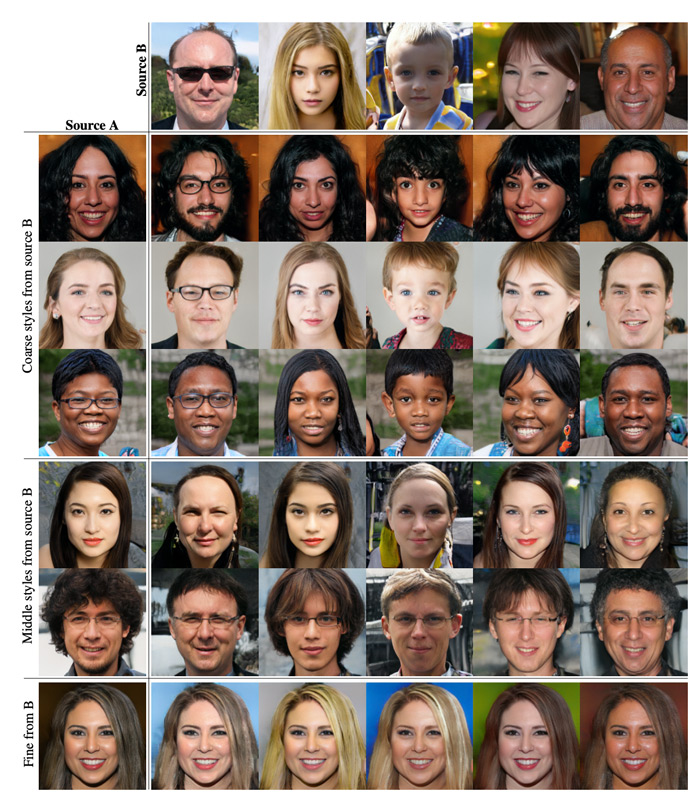



Two sets of images were generated from their respective latent codes (sources A and B); the rest of the images were generated by copying a specified subset of styles from source B and taking the rest from source A. Copying the styles corresponding to coarse spatial resolutions (4 – 8 ) brings high-level aspects such as pose, general hair style, face shape, and eyeglasses from source B, while all colors 
(eyes, hair, lighting) and finer facial features resemble A. If we instead copy the styles of middle resolutions (16 – 32 ) from B, we inherit smaller scale facial features, hair style, eyes open/closed from B, while the pose, general face shape, and eyeglasses from A are preserved.
Finally, copying the fine styles (64 – 1024 ) from B brings mainly the color scheme and microstructure.

[Download the Paper](https://arxiv.org/pdf/1812.04948.pdf)

The **generator in StyleGAN incorporates a mapping network**. The goal of the mapping network is to encode the input vector into an intermediate vector where different elements control different visual features.

With the introduction of another neural network, the model can generate a vector that isn't required to follow the training data distribution and can minimize the correlation between features. 

This mapping network consists of eight fully connected layers where the output is the same size as the input layer, as shown in the following diagram:

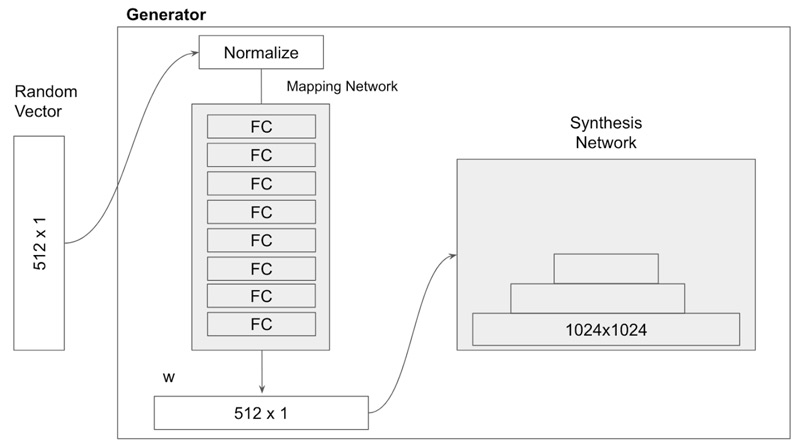

**StyleGAN Model Architecture**

The StyleGAN is described as a progressive growing GAN architecture with five modifications, each of which was added and evaluated incrementally in an ablative study. The incremental list of changes to the generator are:
*   Baseline Progressive GAN.
*   Addition of tuning and bilinear upsampling.
*   Addition of mapping network and AdaIN (styles).
*   Removal of latent vector input to generator.
*   Addition of noise to each block.
*    Addition Mixing regularization.


**Style Models**

The Adaptive Instance Normalization (AdaIN) module transfers the encoded information (that is, the output of the mapping network, w) into the generated image. The AdaIN module is added to each resolution level of the synthesis network. It defines the visual expression of the features at that level. The steps it takes are as follows:
1. Each channel of the convolutional layer output is normalized. This is to ensure that the scaling and shifting in step 3 have the anticipated affect.
2. Another fully connected layer, A, transforms the intermediate vector w into scale and bias vectors for each channel.
3. These scale and bias vectors shift each channel of the convolution output, defining the importance of every filter in the convolution. This tuning process translates w into a visual representation.

What this means in simple terms is that it changes the mean and variance of an image's
neural network layers to match that of a style image (that is, the image whose style we want
to emulate), as shown in the following diagram:

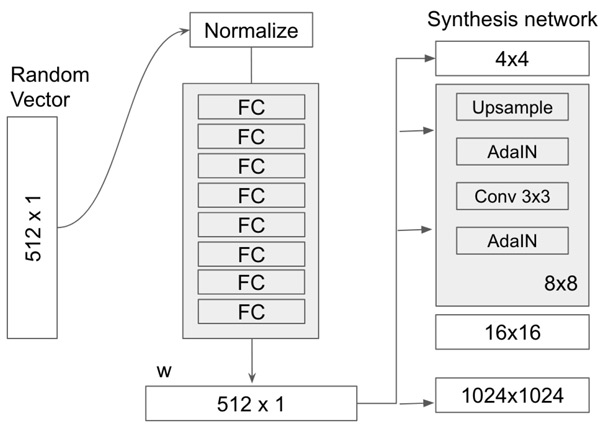

Most GANs (including ProGAN) use random input to create the initial image of the generator (that is, the input to the 4 x 4 level). However, with StyleGAN, the initial input is
replaced with constant values due to the fact that the image features are controlled by w and the AdaIN module.
A synthesis network is replaced with constant input, as shown in the following diagram:

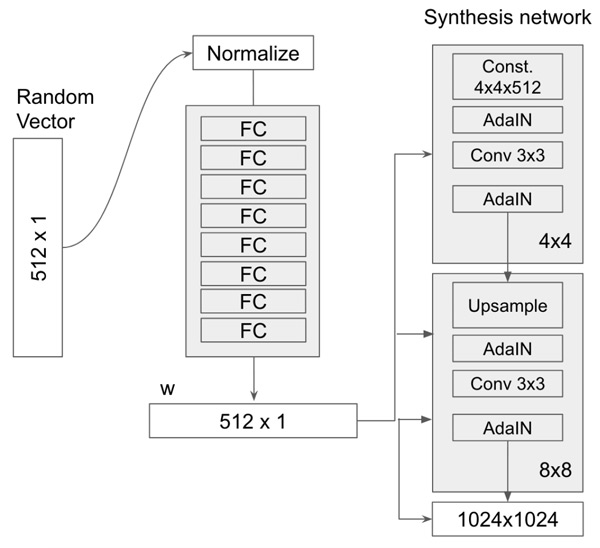

StyleGAN provides a striking example as to how GANs could completely transform how the majority of media produces its content and alter how consumers interpret the information presented to them.



In February 2019, NVIDIA announced that it was open sourcing a tool that generates hyper-realistic images of faces using StyleGAN. The model is trained on the Flickr Faces dataset, which contains 70,000 high-quality PNG images of human faces. The images are at 1,024 x 1,024 resolution and were first aligned and cropped. Users of the open source tool can either use the pretrained model or train their own model in order to generate images of
faces.

The tool can be downloaded by cloning the GitHub repository at: [https://github.com/
NVlabs/stylegan.git.](https://github.com/NVlabs/stylegan.git.)